In [2]:
import pandas as pd
from pandas import read_csv
file = 'C:\\Users\\vatan_2i0ol45\\Desktop\\Gamze\\Supermarket-Sales-Stock.csv'
df = read_csv(file)


In [3]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import recall_score


In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,COGS,Gross Margin Precentage,Gross Income,Rating
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,1/1/2019,10:39,Credit card,435.66,4.761905,21.783,6.9
1,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,1/1/2019,14:47,Cash,380.72,4.761905,19.036,5.7
2,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.413,470.673,1/1/2019,19:07,Cash,448.26,4.761905,22.413,6.7
3,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,1/1/2019,19:48,Credit card,369.80,4.761905,18.490,7.0
4,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,1/1/2019,15:51,Cash,126.44,4.761905,6.322,8.5


In [6]:
input1=df.iloc[:,5]
input3=df.iloc[:,1]
input4=df.iloc[:,-5]


In [7]:
input2= pd.concat([input1, input3, input4], axis=1)

input2.head()

,Product line,Branch,Payment
0,Sports and travel,A,Credit card
1,Home and lifestyle,A,Cash
2,Electronic accessories,B,Cash
3,Sports and travel,C,Credit card
4,Electronic accessories,C,Cash


In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(input2)
feature_names=ohe.get_feature_names()
input5= pd.DataFrame(ohe.fit_transform(input2).toarray(), columns=feature_names)

input5.head()

,x0_Electronic accessories,x0_Fashion accessories,x0_Food and beverages,x0_Health and beauty,x0_Home and lifestyle,x0_Sports and travel,x1_A,x1_B,x1_C,x2_Cash,x2_Credit card,x2_Ewallet
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [9]:
inputs= pd.concat([df, input5], axis=1)

inputs.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,x0_Food and beverages,x0_Health and beauty,x0_Home and lifestyle,x0_Sports and travel,x1_A,x1_B,x1_C,x2_Cash,x2_Credit card,x2_Ewallet
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.413,470.673,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [10]:
inputs.drop(columns=['Invoice ID','Time','Tax 5%','Product line','City','Payment','Branch','Date'],inplace=True)
inputs.head()

,Customer type,Gender,Unit price,Quantity,Total,COGS,Gross Margin Precentage,Gross Income,Rating,x0_Electronic accessories,...,x0_Food and beverages,x0_Health and beauty,x0_Home and lifestyle,x0_Sports and travel,x1_A,x1_B,x1_C,x2_Cash,x2_Credit card,x2_Ewallet
0,Normal,Male,72.61,6,457.443,435.66,4.761905,21.783,6.9,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Member,Male,47.59,8,399.756,380.72,4.761905,19.036,5.7,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Normal,Female,74.71,6,470.673,448.26,4.761905,22.413,6.7,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Member,Female,36.98,10,388.290,369.80,4.761905,18.490,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Normal,Female,63.22,2,132.762,126.44,4.761905,6.322,8.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [11]:


objList = inputs.select_dtypes(include = "object").columns   
print (objList)        


Index(['Customer type', 'Gender'], dtype='object')


In [12]:
le = LabelEncoder()
for features in objList:
    inputs[features] = le.fit_transform(inputs[features])
inputs.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer type              1000 non-null   int32  
 1   Gender                     1000 non-null   int32  
 2   Unit price                 1000 non-null   float64
 3   Quantity                   1000 non-null   int64  
 4   Total                      1000 non-null   float64
 5   COGS                       1000 non-null   float64
 6   Gross Margin Precentage    1000 non-null   float64
 7   Gross Income               1000 non-null   float64
 8   Rating                     1000 non-null   float64
 9   x0_Electronic accessories  1000 non-null   float64
 10  x0_Fashion accessories     1000 non-null   float64
 11  x0_Food and beverages      1000 non-null   float64
 12  x0_Health and beauty       1000 non-null   float64
 13  x0_Home and lifestyle      1000 non-null   float6

In [13]:
inputs.head()

,Customer type,Gender,Unit price,Quantity,Total,COGS,Gross Margin Precentage,Gross Income,Rating,x0_Electronic accessories,...,x0_Food and beverages,x0_Health and beauty,x0_Home and lifestyle,x0_Sports and travel,x1_A,x1_B,x1_C,x2_Cash,x2_Credit card,x2_Ewallet
0,1,1,72.61,6,457.443,435.66,4.761905,21.783,6.9,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,1,47.59,8,399.756,380.72,4.761905,19.036,5.7,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,74.71,6,470.673,448.26,4.761905,22.413,6.7,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,0,36.98,10,388.290,369.80,4.761905,18.490,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,0,63.22,2,132.762,126.44,4.761905,6.322,8.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [14]:
scale = StandardScaler()
scaleddata = pd.DataFrame(scale.fit_transform(inputs), columns=inputs.columns)

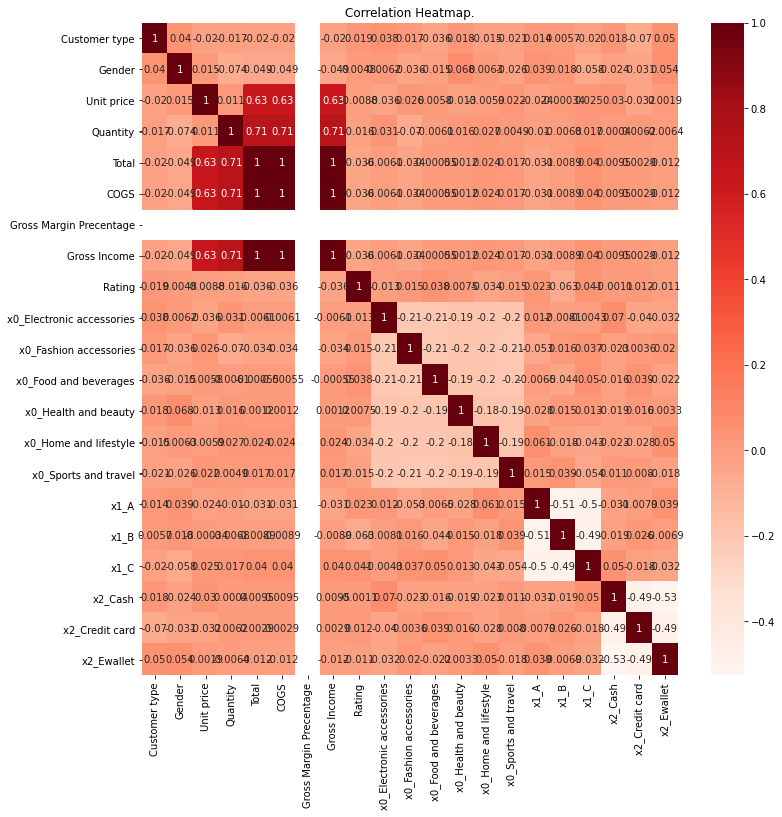

In [15]:
plt.figure(figsize=(12,12))
sn.heatmap(inputs.corr(),annot=True,cmap=plt.cm.Reds).set_title('Correlation Heatmap.')
plt.show()

In [16]:
inputs.head()

,Customer type,Gender,Unit price,Quantity,Total,COGS,Gross Margin Precentage,Gross Income,Rating,x0_Electronic accessories,...,x0_Food and beverages,x0_Health and beauty,x0_Home and lifestyle,x0_Sports and travel,x1_A,x1_B,x1_C,x2_Cash,x2_Credit card,x2_Ewallet
0,1,1,72.61,6,457.443,435.66,4.761905,21.783,6.9,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,1,47.59,8,399.756,380.72,4.761905,19.036,5.7,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,74.71,6,470.673,448.26,4.761905,22.413,6.7,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,0,36.98,10,388.290,369.80,4.761905,18.490,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,0,63.22,2,132.762,126.44,4.761905,6.322,8.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# GENDER TAHMİNİ

In [17]:
b=inputs.copy() 
b.drop(columns=['Gender'],inplace=True)
b.head(4)

,Customer type,Unit price,Quantity,Total,COGS,Gross Margin Precentage,Gross Income,Rating,x0_Electronic accessories,x0_Fashion accessories,x0_Food and beverages,x0_Health and beauty,x0_Home and lifestyle,x0_Sports and travel,x1_A,x1_B,x1_C,x2_Cash,x2_Credit card,x2_Ewallet
0,1,72.61,6,457.443,435.66,4.761905,21.783,6.9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,47.59,8,399.756,380.72,4.761905,19.036,5.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,74.71,6,470.673,448.26,4.761905,22.413,6.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,36.98,10,388.290,369.80,4.761905,18.490,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [18]:
b.shape

(1000, 20)

In [19]:
x = b.iloc[:,0:20]
y = inputs.iloc[:,1]
y.head(4)

0    1
1    1
2    0
3    0
Name: Gender, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
x_train1, x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
scale.fit(x_train1)
x_train_std=scale.transform(x_train1)
x_test_std=scale.transform(x_test1)

eğitim verisi için doğruluk oranı:  0.5514285714285714


test verisi için doğruluk:  0.5166666666666667
Precision: 0.5596590909090909
Recall: 0.5533707865168539
Precision-test: 0.5714285714285714
Recall-test 0.5060240963855421
0.5367412140575081
0.556497175141243


<AxesSubplot:>

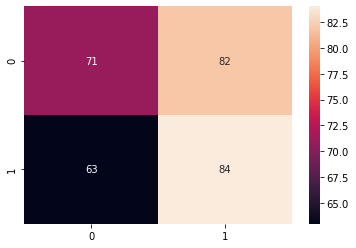

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix, recall_score, precision_score

model = LogisticRegression( max_iter=5000)
model.fit(x_train_std, y_train1)

y_pred = model.predict(x_test_std)
y_pred1 = model.predict(x_train_std)


print('eğitim verisi için doğruluk oranı: ',accuracy_score(y_pred1,y_train1))
print('\n')
print('test verisi için doğruluk: ',accuracy_score(y_pred,y_test1))

print("Precision:", precision_score(y_pred1,y_train1))
print("Recall:",recall_score(y_pred1,y_train1))

print("Precision-test:", precision_score(y_pred,y_test1))
print("Recall-test",recall_score(y_pred,y_test1))

print(f1_score(y_pred,y_test1))
print(f1_score(y_pred1,y_train1))

cm = confusion_matrix(y_test1,model.predict(x_test_std))
sn.heatmap(cm,annot=True,fmt="d")

eğitim verisi için doğruluk oranı:  0.5728571428571428


test verisi için doğruluk:  0.4766666666666667
Precision: 0.6505681818181818
Recall: 0.5654320987654321
Precision-test: 0.5714285714285714
Recall-test 0.47191011235955055
0.5169230769230769
0.6050198150594451


<AxesSubplot:>

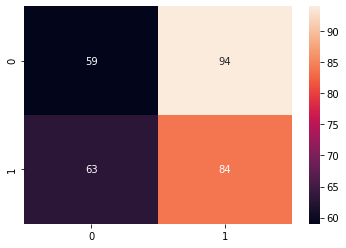

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

dtc = DecisionTreeClassifier(max_depth=3)

dtc.fit(x_train_std, y_train1)
pred = dtc.predict(x_test_std)
pred1 = dtc.predict(x_train_std)

print('eğitim verisi için doğruluk oranı: ',accuracy_score(pred1,y_train1))
print('\n')
print('test verisi için doğruluk: ',accuracy_score(pred,y_test1))

print("Precision:", precision_score(pred1,y_train1))
print("Recall:",recall_score(pred1,y_train1))

print("Precision-test:", precision_score(pred,y_test1))
print("Recall-test",recall_score(pred,y_test1))

print(f1_score(pred,y_test1))
print(f1_score(pred1,y_train1))




cm = confusion_matrix(y_test1,dtc.predict(x_test_std))
sn.heatmap(cm,annot=True,)

In [71]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier()
mlp.fit(x_train_std,y_train1)
pred2 = mlp.predict(x_test_std)
pred3= mlp.predict(x_train_std)

print('eğitim verisi için doğruluk oranı: ',accuracy_score(pred3,y_train1))
print('\n')
print('test verisi için doğruluk: ',accuracy_score(pred2,y_test1))

print("Precision:", precision_score(pred3,y_train1))
print("Recall:",recall_score(pred3,y_train1))

print("Precision-test:", precision_score(pred2,y_test1))
print("Recall-test",recall_score(pred2,y_test1))

print(f1_score(pred2,y_test1))
print(f1_score(pred3,y_train1))

eğitim verisi için doğruluk oranı:  0.7785714285714286


test verisi için doğruluk:  0.5166666666666667
Precision: 0.7954545454545454
Recall: 0.7713498622589532
Precision-test: 0.4897959183673469
Recall-test 0.5070422535211268
0.4982698961937716
0.7832167832167831


C:\Users\vatan_2i0ol45\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Mlp için parametre optimizasyonu

In [81]:
from sklearn.model_selection import GridSearchCV
parametre1={'hidden_layer_sizes':[200,300,100],'max_iter':[5000,1000,700],
           'alpha':[0.001,0.005],'learning_rate_init':[0.001,0.05]}

model12 = MLPClassifier()
yeni_model12=GridSearchCV(model12,cv=10,param_grid=parametre1, verbose = 1, n_jobs = -1)

yeni_model12.fit(x_train_std,y_train1)
pred12 = yeni_model12.predict(x_test_std)
pred13= yeni_model12.predict(x_train_std)




Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [79]:
best_parameters1 = yeni_model12.best_params_
print('en iyi parametreler', best_parameters1)

en iyi parametreler {'alpha': 0.01, 'hidden_layer_sizes': 300, 'learning_rate_init': 0.01, 'max_iter': 500}


In [80]:
print('eğitim verisi için doğruluk oranı: ',accuracy_score(pred13,y_train1))
print('\n')
print('test verisi için doğruluk: ',accuracy_score(pred12,y_test1))

print("Precision:", precision_score(pred13,y_train1))
print("Recall:",recall_score(pred13,y_train1))

print("Precision-test:", precision_score(pred12,y_test1))
print("Recall-test",recall_score(pred12,y_test1))

print(f1_score(pred12,y_test1))
print(f1_score(pred13,y_train1))      


eğitim verisi için doğruluk oranı:  1.0


test verisi için doğruluk:  0.53
Precision: 1.0
Recall: 1.0
Precision-test: 0.54421768707483
Recall-test 0.5194805194805194
0.53156146179402
1.0


In [39]:
import xgboost 

xgb = xgboost.XGBClassifier(eval_metric = "logloss")
xgb.fit(x_train_std,y_train1)
pred = xgb.predict(x_test_std)
pred1= xgb.predict(x_train_std)

print('eğitim verisi için doğruluk oranı: ',accuracy_score(pred1,y_train1))
print('\n')
print('test verisi için doğruluk: ',accuracy_score(pred,y_test1))

print("Precision:", precision_score(pred1,y_train1))
print("Recall:",recall_score(pred1,y_train1))

print("Precision-test:", precision_score(pred,y_test1))
print("Recall-test",recall_score(pred,y_test1))

print(f1_score(pred,y_test1))
print(f1_score(pred1,y_train1))      





eğitim verisi için doğruluk oranı:  1.0


test verisi için doğruluk:  0.51
Precision: 1.0
Recall: 1.0
Precision-test: 0.45962732919254656
Recall-test 0.5522388059701493
0.5016949152542374
1.0


C:\Users\vatan_2i0ol45\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:>

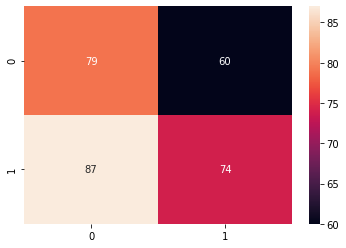

In [40]:
cm = confusion_matrix(y_test1,pred)
sn.heatmap(cm,annot=True,fmt="d")

<AxesSubplot:>

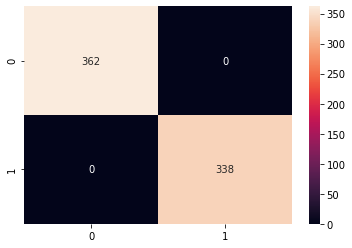

In [43]:
cm = confusion_matrix(pred1,y_train1)
sn.heatmap(cm,annot=True,fmt="d")

# Aşırı öğrenme problemi parametre optimizasyonu

In [44]:
from sklearn.model_selection import GridSearchCV
parametre={'n_estimators':[100,200,250,300,400],'max_depth':[3,5,6,7,2],
           'learning_rate':[0.01,0.05,0.1,0.5]}

model11 = xgboost.XGBClassifier(eval_metric = "logloss",use_label_encoder=False)
yeni_model=GridSearchCV(model11,cv=10,param_grid=parametre, verbose = 1, n_jobs = -1)

yeni_model.fit(x_train_std,y_train1)
pred = yeni_model.predict(x_test_std)
pred1= yeni_model.predict(x_train_std)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [45]:
best_parameters = yeni_model.best_params_
print('en iyi parametreler', best_parameters)

en iyi parametreler {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [46]:
print('eğitim verisi için doğruluk oranı: ',accuracy_score(pred1,y_train1))
print('\n')
print('test verisi için doğruluk: ',accuracy_score(pred,y_test1))

print("Precision:", precision_score(pred1,y_train1))
print("Recall:",recall_score(pred1,y_train1))

print("Precision-test:", precision_score(pred,y_test1))
print("Recall-test",recall_score(pred,y_test1))

f1_score(pred,y_test1)
f1_score(pred1,y_train1)      


eğitim verisi için doğruluk oranı:  0.6757142857142857


test verisi için doğruluk:  0.49333333333333335
Precision: 0.6863905325443787
Recall: 0.6572237960339944
Precision-test: 0.4782608695652174
Recall-test 0.5310344827586206


0.6714905933429811

<AxesSubplot:>

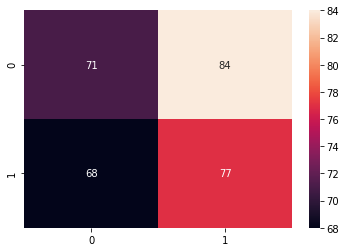

In [47]:
cm = confusion_matrix(pred,y_test1)
sn.heatmap(cm,annot=True,fmt="d")

<AxesSubplot:>

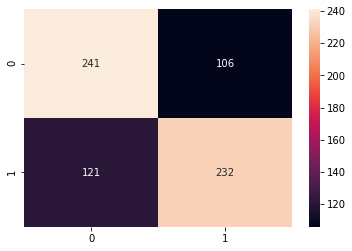

In [48]:
cm = confusion_matrix(pred1,y_train1)
sn.heatmap(cm,annot=True,fmt="d")

aşırı öğrenme problemini giderdik ama modelin test tahmin sonuçları hala düşük

C:\Users\vatan_2i0ol45\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vatan_2i0ol45\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vatan_2i0ol45\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vatan_2i0ol45\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vatan_2i0ol45\anaconda3\lib\sit

[0.54285714 0.5        0.58571429 0.64285714 0.41428571 0.44285714
 0.41428571 0.41428571 0.5        0.51428571]
Doğruluk (Accuracy): 49.714%
eğitim verisi için doğruluk oranı:  0.7742857142857142


test verisi için doğruluk:  0.53
Precision: 0.7755681818181818
Recall: 0.7755681818181818
Precision-test: 0.5034013605442177
Recall-test 0.5211267605633803
0.5121107266435986
0.7755681818181818


C:\Users\vatan_2i0ol45\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<AxesSubplot:>

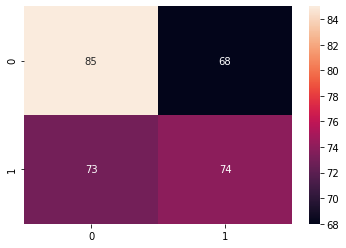

In [43]:
from sklearn.model_selection import cross_val_score

cv_scores2 = []

scores2 = cross_val_score(mlp, x_train_std, y_train1, cv=10)
cv_scores2.append(scores2.mean())

print(scores2)
print("Doğruluk (Accuracy): %.3f%%" % (scores2.mean()*100))

print('eğitim verisi için doğruluk oranı: ',accuracy_score(pred3,y_train1))
print('\n')
print('test verisi için doğruluk: ',accuracy_score(pred2,y_test1))

print("Precision:", precision_score(pred3,y_train1))
print("Recall:",recall_score(pred3,y_train1))

print("Precision-test:", precision_score(pred2,y_test1))
print("Recall-test",recall_score(pred2,y_test1))

print(f1_score(pred2,y_test1))
print(f1_score(pred3,y_train1))     

cm = confusion_matrix(y_test1,mlp.predict(x_test_std))
sn.heatmap(cm,annot=True,fmt="d")

eğitim verisi için doğruluk oranı:  0.7528571428571429


test verisi için doğruluk:  0.5466666666666666
Recall-eğitim: 0.7507002801120448
Recall-test: 0.5578231292517006


# Regresyon ile Gross Income tahmini

In [27]:
inputs.head()

,Customer type,Gender,Unit price,Quantity,Total,COGS,Gross Margin Precentage,Gross Income,Rating,x0_Electronic accessories,...,x0_Food and beverages,x0_Health and beauty,x0_Home and lifestyle,x0_Sports and travel,x1_A,x1_B,x1_C,x2_Cash,x2_Credit card,x2_Ewallet
0,1,1,72.61,6,457.443,435.66,4.761905,21.783,6.9,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,1,47.59,8,399.756,380.72,4.761905,19.036,5.7,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,74.71,6,470.673,448.26,4.761905,22.413,6.7,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,0,36.98,10,388.290,369.80,4.761905,18.490,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,0,63.22,2,132.762,126.44,4.761905,6.322,8.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [28]:
inputs4=inputs.copy() 
inputs4.drop(columns=['Gross Income'],inplace=True)
inputs4.head(4)


,Customer type,Gender,Unit price,Quantity,Total,COGS,Gross Margin Precentage,Rating,x0_Electronic accessories,x0_Fashion accessories,x0_Food and beverages,x0_Health and beauty,x0_Home and lifestyle,x0_Sports and travel,x1_A,x1_B,x1_C,x2_Cash,x2_Credit card,x2_Ewallet
0,1,1,72.61,6,457.443,435.66,4.761905,6.9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,1,47.59,8,399.756,380.72,4.761905,5.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,74.71,6,470.673,448.26,4.761905,6.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,0,36.98,10,388.290,369.80,4.761905,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [29]:
inputs4.shape


(1000, 20)

In [34]:
x2 = inputs4.iloc[:,0:20]
y2 = inputs.iloc[:,7]
y2.head(4)

0    21.783
1    19.036
2    22.413
3    18.490
Name: Gross Income, dtype: float64

In [35]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=0)
scale.fit(x_train2)
x_train_std2=scale.transform(x_train2)
x_test_std2=scale.transform(x_test2)



In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf6= RandomForestRegressor(max_depth=5,n_estimators=300, min_samples_leaf=10,min_samples_split=10)
rf6.fit(x_train_std2,y_train2)

pre_train2=rf6.predict(x_train_std2)
pre_test2= rf6.predict(x_test_std2)



print('R-kare (eğitim): %.4f' % r2_score(y_train2, pre_train2))   
print('R-kare (test): %.4f\n' % r2_score(y_test2, pre_test2))
print("MSE-Eğitim: %.3f"      % mean_squared_error(y_train2, pre_train2))
print("MSE-Test: %.3f"      % mean_squared_error(y_test2, pre_test2))


R-kare (eğitim): 0.9988
R-kare (test): 0.9989

MSE-Eğitim: 0.177
MSE-Test: 0.131


In [37]:
from sklearn.model_selection import cross_val_score

cv_scores3 = []

scores3 = cross_val_score(rf6, x_train_std2, y_train2, cv=10)
cv_scores3.append(scores3.mean())

print(scores3)
print('R-kare (eğitim): %.4f' % (scores3.mean()*100))   
print('R-kare (test): %.4f\n' % r2_score(y_test2, pre_test2))
print("MSE-Eğitim: %.3f"      % mean_squared_error(y_train2, pre_train2))
print("MSE-Test: %.3f"      % mean_squared_error(y_test2, pre_test2))




[0.99936264 0.99648439 0.999449   0.99912225 0.99819686 0.99594725
 0.99931781 0.99662797 0.99949305 0.99862007]
R-kare (eğitim): 99.8262
R-kare (test): 0.9990

MSE-Eğitim: 0.172
MSE-Test: 0.129


In [47]:
from sklearn.neural_network import MLPRegressor


mlp2 = MLPRegressor()
mlp2.fit(x_train_std2,y_train2)


C:\Users\vatan_2i0ol45\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [54]:
from sklearn.metrics import mean_absolute_error
pre_train1=mlp2.predict(x_train_std2)
pre_test1= mlp2.predict(x_test_std2)

print('R-kare (eğitim): %.4f' % r2_score(y_train2, pre_train1))   
print('R-kare (test): %.4f\n' % r2_score(y_test2, pre_test1))
print("MSE-Eğitim: %.3f"      % mean_squared_error(y_train2, pre_train1))
print("MSE-Test: %.3f"      % mean_squared_error(y_test2, pre_test1))
print("MAE -Test: %.3f" % mean_absolute_error(y_test2, pre_test1))
print("MAE -Eğitim: %.3f" % mean_absolute_error(y_train2, pre_train1))


R-kare (eğitim): 0.9949
R-kare (test): 0.9912

MSE-Eğitim: 0.728
MSE-Test: 1.092
MAE -Test: 0.826
MAE -Eğitim: 0.667


In [56]:
y_train2.describe()

count    700.000000
mean      15.431707
std       11.935264
min        0.604500
25%        5.821250
50%       12.066000
75%       22.515250
max       49.490000
Name: Gross Income, dtype: float64

In [57]:
y_test2.describe()

count    300.000000
mean      15.257247
std       11.181116
min        0.508500
25%        6.066250
50%       12.298750
75%       22.416750
max       49.650000
Name: Gross Income, dtype: float64

In [61]:
import xgboost

xgb22 = xgboost.XGBRegressor()
xgb22.fit(x_train2,y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
pre_train21=xgb22.predict(x_train2)
pre_test22= xgb22.predict(x_test2)

print('R-kare (eğitim): %.4f' % r2_score(y_train2, pre_train21))   
print('R-kare (test): %.4f\n' % r2_score(y_test2, pre_test22))

print("MSE-Eğitim: %.3f"      % mean_squared_error(y_train2, pre_train21))
print("MSE-Test: %.3f"      % mean_squared_error(y_test2, pre_test22))

print("MAE -Test: %.3f" % mean_absolute_error(y_test2, pre_test22))
print("MAE -Eğitim: %.3f" % mean_absolute_error(y_train2, pre_train21))


R-kare (eğitim): 1.0000
R-kare (test): 0.9998

MSE-Eğitim: 0.000
MSE-Test: 0.023
MAE -Test: 0.108
MAE -Eğitim: 0.008
